#BUSINESS UNDERSTANDING


**Project Domain**


Proyek ini berada dalam domain e-commerce dan industri perhiasan, khususnya pada sektor penjualan berlian. Dalam dunia perdagangan berlian, harga sangat dipengaruhi oleh kombinasi faktor fisik seperti karat, kejernihan, potongan, dan warna. Oleh karena itu, prediksi harga secara otomatis dapat membantu toko perhiasan, penjual online, dan pembeli dalam membuat keputusan yang cepat dan akurat.

**Problem** **Statement**

Menentukan harga berlian secara manual sering kali membutuhkan keahlian khusus dan waktu yang tidak sedikit. Proses ini juga rawan subjektivitas atau kesalahan estimasi, terutama bagi penjual pemula atau platform e-commerce yang mengelola ribuan produk. Tanpa sistem prediksi otomatis, bisnis bisa kehilangan pelanggan karena harga tidak kompetitif atau terlalu jauh dari nilai pasar.

**Goals**

Tujuan utama dari proyek ini adalah:

Membangun model machine learning berbasis Artificial Neural Network (ANN) untuk memprediksi harga berlian secara otomatis berdasarkan fitur-fitur seperti:

Carat (berat)

Cut (kualitas potongan)

Color (warna)

Clarity (kejernihan)

Dimensi fisik (x, y, z)

Mencapai tingkat akurasi prediksi yang tinggi dengan target R² ≥ 0.80, sehingga hasil prediksi dapat digunakan secara nyata dalam proses penentuan harga.

Mempermudah proses penilaian harga berlian untuk pelaku bisnis dan konsumen.

**Solution** **Statement**

Solusi yang ditawarkan adalah membangun sebuah sistem berbasis Artificial Neural Network (ANN) yang:

Melakukan preprocessing otomatis terhadap data fitur (encoding, scaling, dsb)

Melatih model prediksi dengan ribuan sampel data berlian

Menyediakan prediksi harga berdasarkan input spesifikasi berlian

Memiliki akurasi tinggi (R² ≥ 0.80), dan dapat dievaluasi dengan metrik seperti MAE, RMSE, dan R² Score

Dengan solusi ini, sistem dapat membantu pengguna:

Menilai harga berlian secara objektif dan konsisten

Menyederhanakan penilaian harga untuk platform jual beli online

Mengurangi waktu dan biaya operasional dalam proses evaluasi berlian



# DATA UNDERSTANDING

Import data dari kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"teukualfathcyril","key":"eb529765bd071e61b8fc80965ccffa7e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d shubhankitsirvaiya06/diamond-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhankitsirvaiya06/diamond-price-prediction
License(s): unknown
  0% 0.00/606k [00:00<?, ?B/s]
100% 606k/606k [00:00<00:00, 832MB/s]


In [5]:
!mkdir diamond-price-prediction-dataset
!unzip diamond-price-prediction.zip -d diamond-price-prediction-dataset
!ls diamond-price-prediction-dataset

Archive:  diamond-price-prediction.zip
  inflating: diamond-price-prediction-dataset/diamonds.csv  
diamonds.csv


Import library yang dibutuhkan

In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import pickle

#EXPLORATORY DATA ANALYSIS

In [7]:
df = pd.read_csv('diamond-price-prediction-dataset/diamonds.csv')
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Histogram -Distribusi Harga Berlian

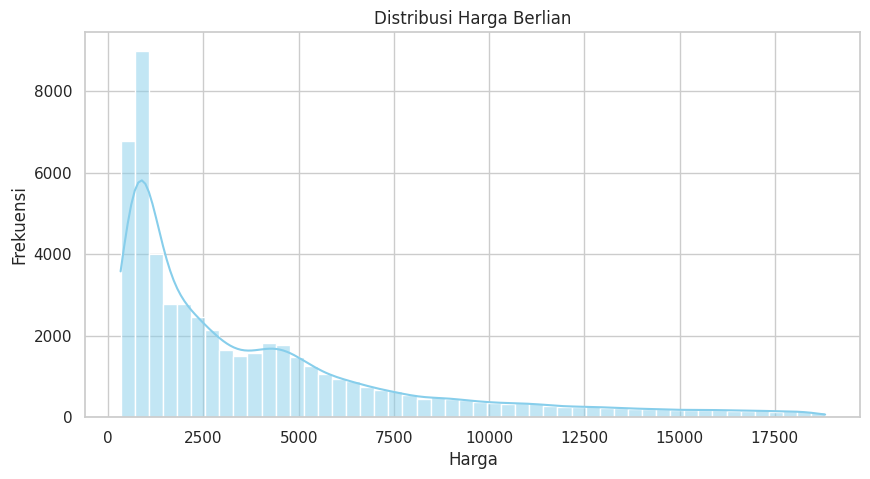

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribusi Harga Berlian')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

Hubungan Panjang dan Lebar - Scatter Plot

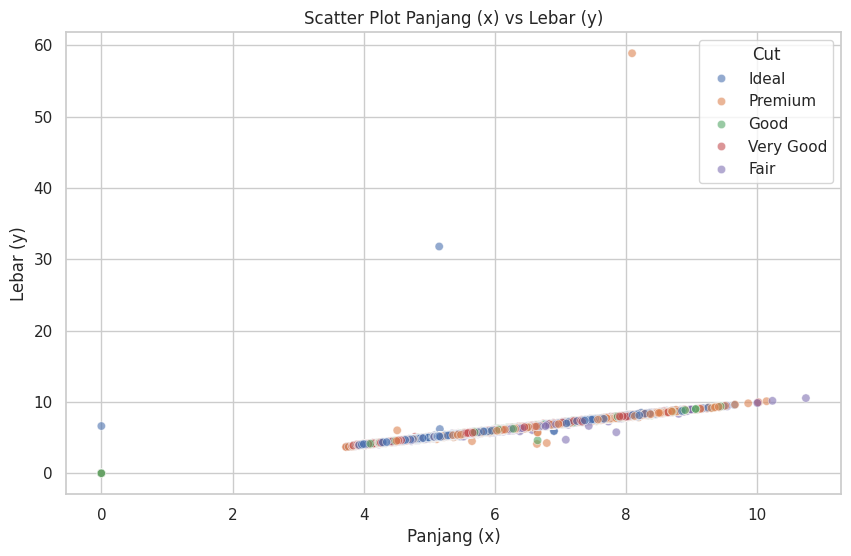

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='cut', alpha=0.6)
plt.title('Scatter Plot Panjang (x) vs Lebar (y)')
plt.xlabel('Panjang (x)')
plt.ylabel('Lebar (y)')
plt.legend(title='Cut')
plt.show()

Perbandingan Harga berdasarkan Cut - Boxplot

<ipython-input-14-566533349>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cut', y='price', palette='Set2')


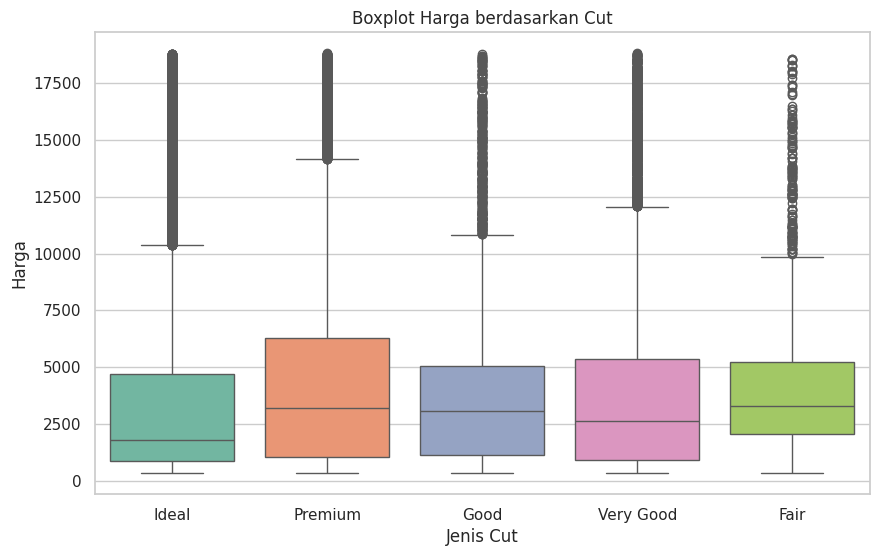

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', palette='Set2')
plt.title('Boxplot Harga berdasarkan Cut')
plt.xlabel('Jenis Cut')
plt.ylabel('Harga')
plt.show()

Heatmap Korelasi Numerik

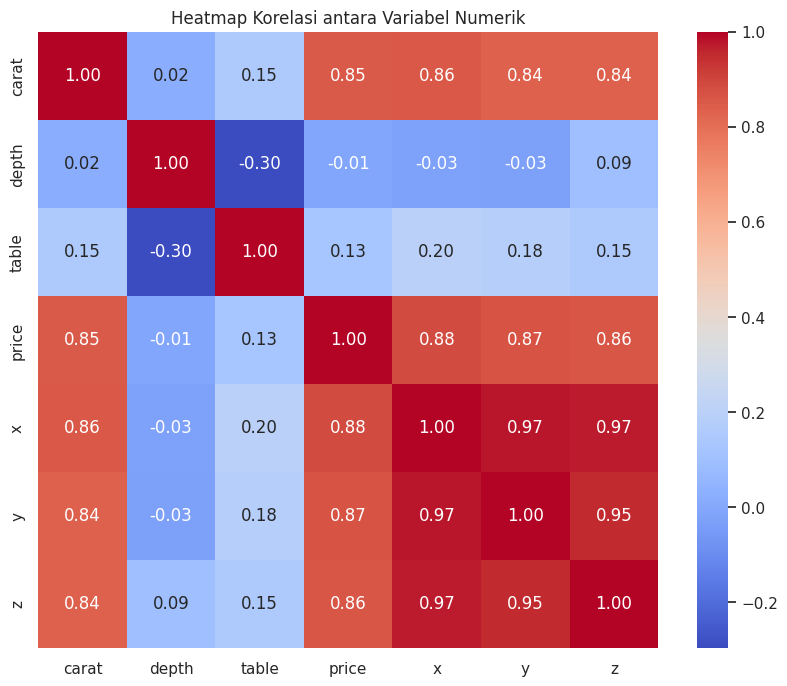

In [15]:
plt.figure(figsize=(10, 8))
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Variabel Numerik')
plt.show()

Bar Chart berdasarkan Warna dan Kejernihan


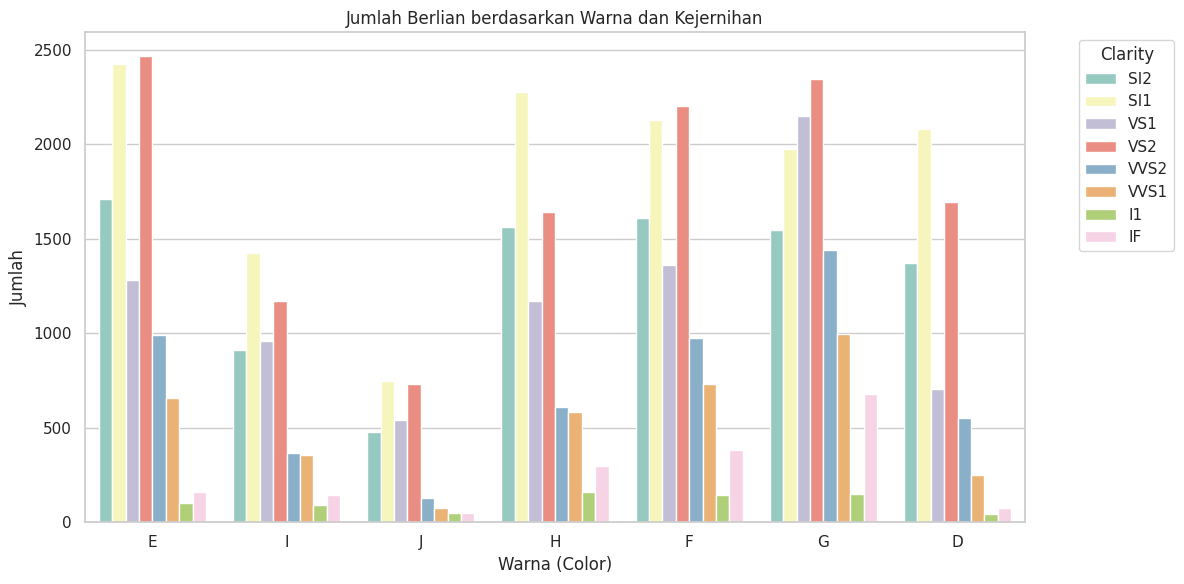

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='color', hue='clarity', palette='Set3')
plt.title('Jumlah Berlian berdasarkan Warna dan Kejernihan')
plt.xlabel('Warna (Color)')
plt.ylabel('Jumlah')
plt.legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#DATA PREPARATION SCALLING & SPLIT DATA


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
data = df.copy()

In [19]:
label_encoders = {}
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [20]:
X = data.drop(['price'], axis=1)
y = data['price']

karna standard scaler hanya bisa memproses data numerik, jadi saya drop semua kolom yang bertipe datetime

In [22]:
print(X.dtypes)

carat      datetime64[ns]
cut                 int64
color               int64
clarity             int64
depth             float64
table             float64
x                 float64
y                 float64
z                 float64
dtype: object


In [23]:
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64'])

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [27]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

Ukuran X_train: (43152, 8)
Ukuran X_test : (10788, 8)
Ukuran y_train: (43152,)
Ukuran y_test : (10788,)


#MODELING MENGGUNAKAN ANN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output 1 untuk prediksi harga
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

untuk menghentikan training jika tidak membaik

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [33]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13942188.0000 - mae: 2151.8494 - val_loss: 1507090.7500 - val_mae: 731.6187
Epoch 2/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1765735.7500 - mae: 732.7114 - val_loss: 1388947.0000 - val_mae: 709.1808
Epoch 3/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2261558.7500 - mae: 727.2754 - val_loss: 1336117.7500 - val_mae: 703.9717
Epoch 4/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1698801.3750 - mae: 718.5989 - val_loss: 1306203.6250 - val_mae: 687.3331
Epoch 5/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1528139.5000 - mae: 692.0093 - val_loss: 1273812.2500 - val_mae: 671.3713
Epoch 6/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1374227.3750 - mae: 668.3741 - val_loss: 1235759.1250 - val_mae: 652.5555
Epoch 7/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1464567.1250 - mae: 660.0456 - val_loss: 1189713.0000 - val_mae: 630.6088
Epoch 8/100
1079/1079 ━━━━━━━━━━━━━━━━━

In [34]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")
print(f"Test Loss (MSE): {loss:.2f}")

Test MAE: 328.61
Test Loss (MSE): 351564.28


#SKEMA EVALUASI TARGET 80%

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [36]:
y_pred = model.predict(X_test).flatten()

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f} ({r2*100:.2f}%)")

MAE  : 328.61
MSE  : 351564.38
RMSE : 592.93
R²   : 0.9779 (97.79%)


In [39]:
if r2 >= 0.80:
    print("✅ Model memenuhi target akurasi (R² ≥ 0.80)")
else:
    print("❌ Model belum memenuhi target akurasi (R² < 0.80)")

✅ Model memenuhi target akurasi (R² ≥ 0.80)


visualisasi prediksi vs aktual

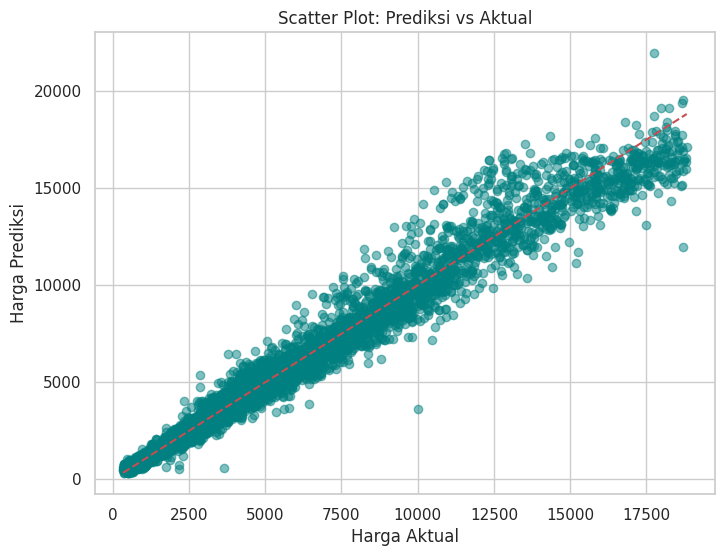

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Scatter Plot: Prediksi vs Aktual')
plt.grid(True)
plt.show()